<a href="https://colab.research.google.com/github/tdack21/cosmologia_ml/blob/main/Tarea__11_cosmoml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 11. Cosmología con Machine Learning

Tonatiuh Sánchez Madrid

**Plot the CMB and matter power spectrum (MPK) for díferent combinations of $w_0$, $w_a$ (CPL model).**

In [1]:
!pip install classy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 32.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for classy: filename=classy-3.3.0.0-cp311-cp311-linux_x86_64.whl size=11972330 sha256=f71bf20f8ce1fdf6bd47313760b2d2c411b1b1b17d8d47052cb75e6fe1c443bc
  Stored in directory: /root/.cache/pip/wheels/98/b8/29/4fc545f931b5f16fca92543b997f87f87da8ce584f067ea8d7
Successfully built classy


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'
from classy import Class

In [3]:
# Define (w0, wa) combinations for CPL dark energy
w0_wa_combinations = [
    {'w0_fld': -1.0, 'wa_fld': 0.0},   # ΛCDM (cosmological constant)
    {'w0_fld': -0.9, 'wa_fld': -0.3},  # Dynamical dark energy
    {'w0_fld': -1.1, 'wa_fld': 0.3},   # Phantom crossing
    {'w0_fld': -0.8, 'wa_fld': -0.5},  # Strongly evolving
]

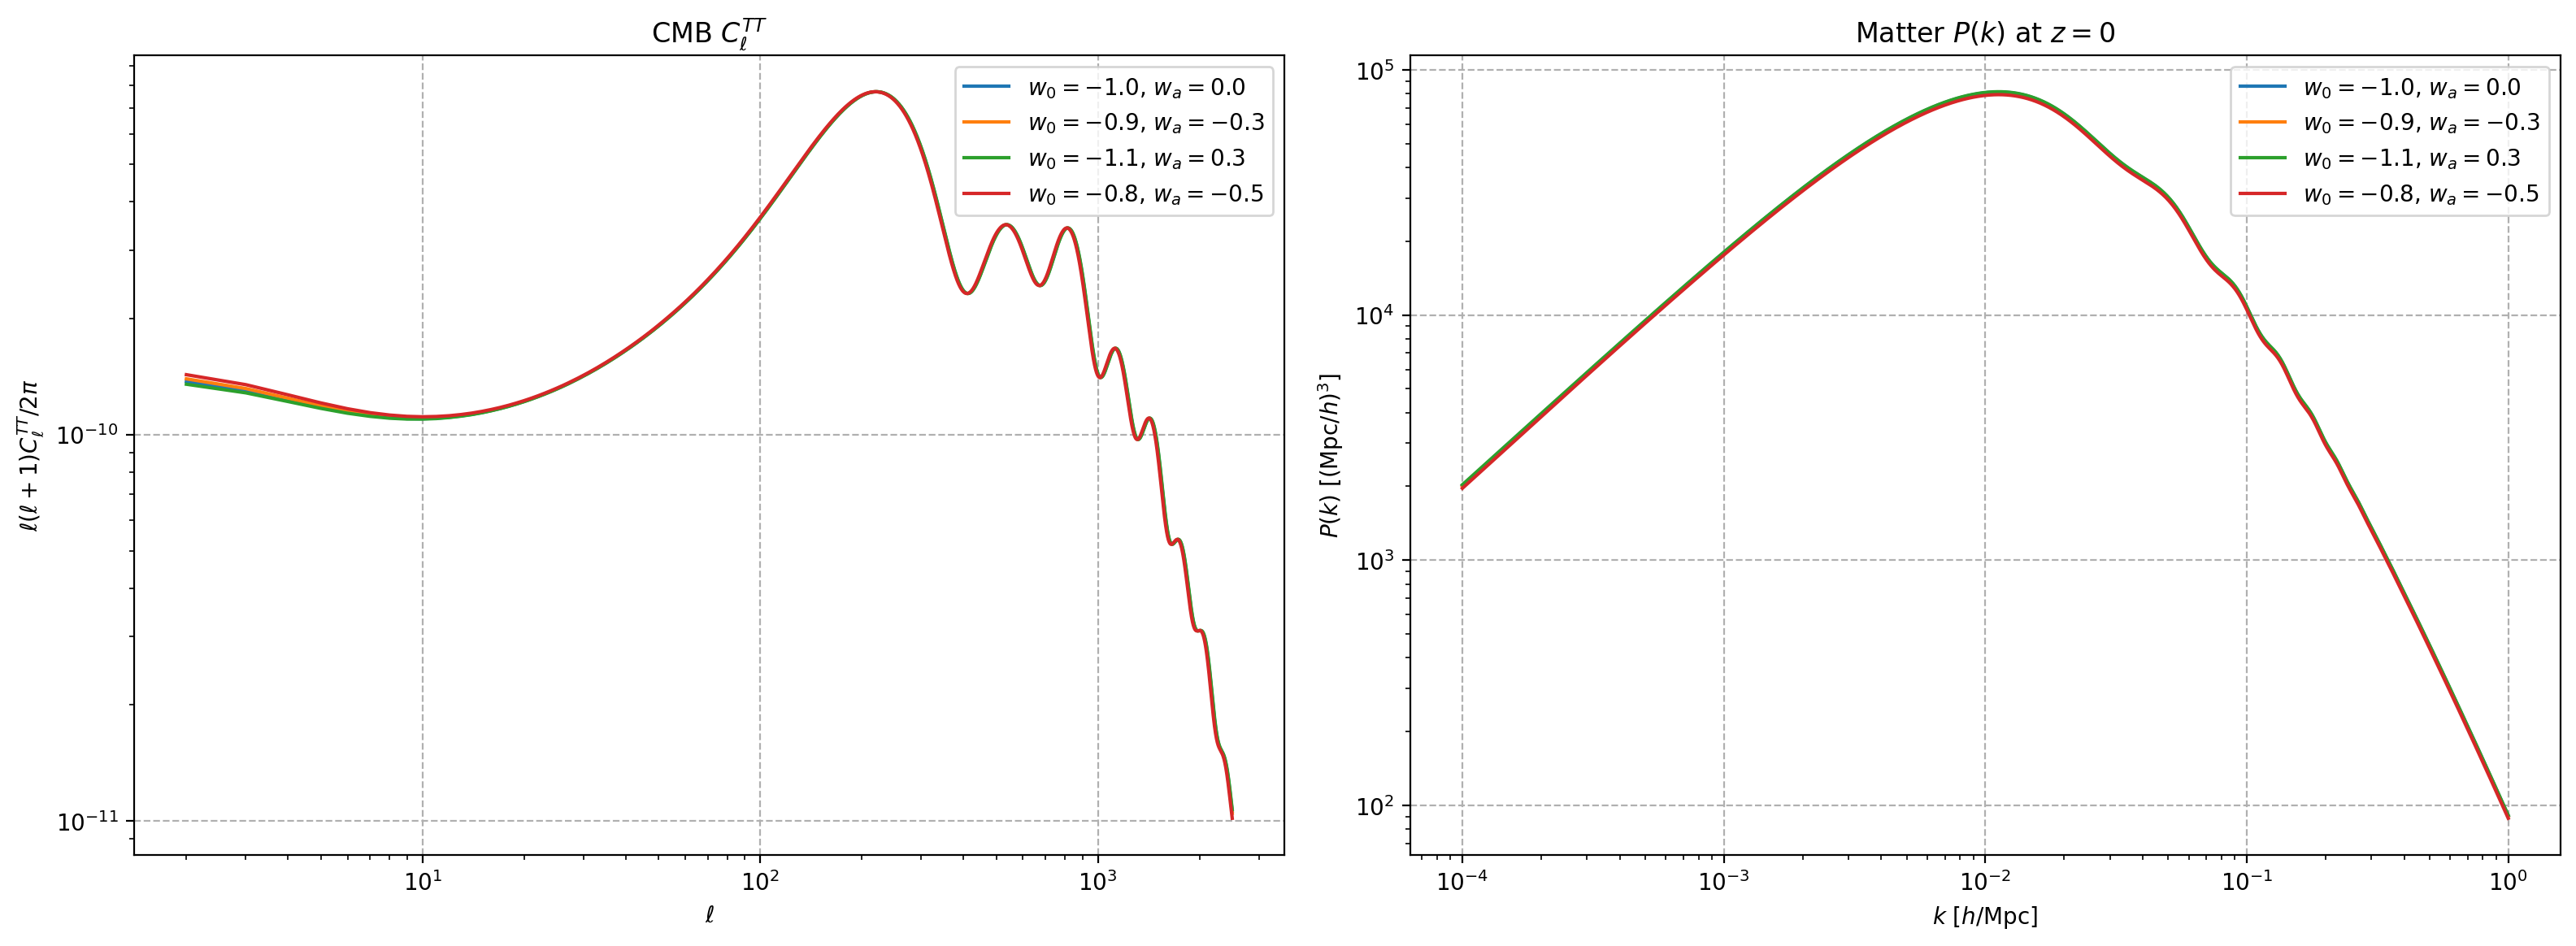

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for params in w0_wa_combinations:
    cosmo_cpl = Class()
    cosmo_cpl.set({'Omega_Lambda':0.})
    cosmo_cpl.set({'omega_b':0.022383,'omega_cdm':0.12011,'h':0.6732,'ln_A_s_1e10':3.0448,'n_s':0.96605,'tau_reio':0.0543})
    cosmo_cpl.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
    #cosmo_cpl.set({'output':'tCl mPk dTk vTk', 'k_output_values':0.5})
    cosmo_cpl.set(params)
    cosmo_cpl.compute()

    try:
        cosmo_cpl.compute()

        # ----- CMB Power Spectrum -----
        cls = cosmo_cpl.lensed_cl()
        ell = cls['ell'][2:]      # Skip ell=0,1
        cl_tt = cls['tt'][2:]
        ax1.loglog(ell, ell*(ell+1)*cl_tt/(2*np.pi),
                  label=f"$w_0={params['w0_fld']}$, $w_a={params['wa_fld']}$")

        # ----- Matter Power Spectrum -----
        k = np.logspace(-4, 0, 1000)  # k in h/Mpc
        pk = np.array([cosmo_cpl.pk(ki, 0.0) for ki in k])
        ax2.loglog(k, pk,
                  label=f"$w_0={params['w0_fld']}$, $w_a={params['wa_fld']}$")

    except Exception as e:
        print(f"Error for w0_fld={params['w0_fld']}, wa_fld={params['wa_fld']}: {e}")
    finally:
        cosmo_cpl.struct_cleanup()

# Plot formatting
ax1.set_title('CMB $C_\ell^{TT}$')
ax1.set_xlabel('$\ell$')
ax1.set_ylabel('$\ell(\ell+1)C_\ell^{TT}/2\pi$')
ax1.legend()
ax1.grid(True, ls="--")

ax2.set_title('Matter $P(k)$ at $z=0$')
ax2.set_xlabel('$k$ [$h$/Mpc]')
ax2.set_ylabel('$P(k)$ [$(\mathrm{Mpc}/h)^3$]')
ax2.legend()
ax2.grid(True, ls="--")

plt.tight_layout()
plt.savefig('cmb_mpk_w0wa_corrected.png', dpi=150)
plt.show()

**Do the same for díferent values of the spectral index ns.**

In [12]:
# Define different values of the spectral index n_s
ns_values = [0.92, 0.96, 1.00, 1.04]  # Ranging from red-tilted to blue-tilted

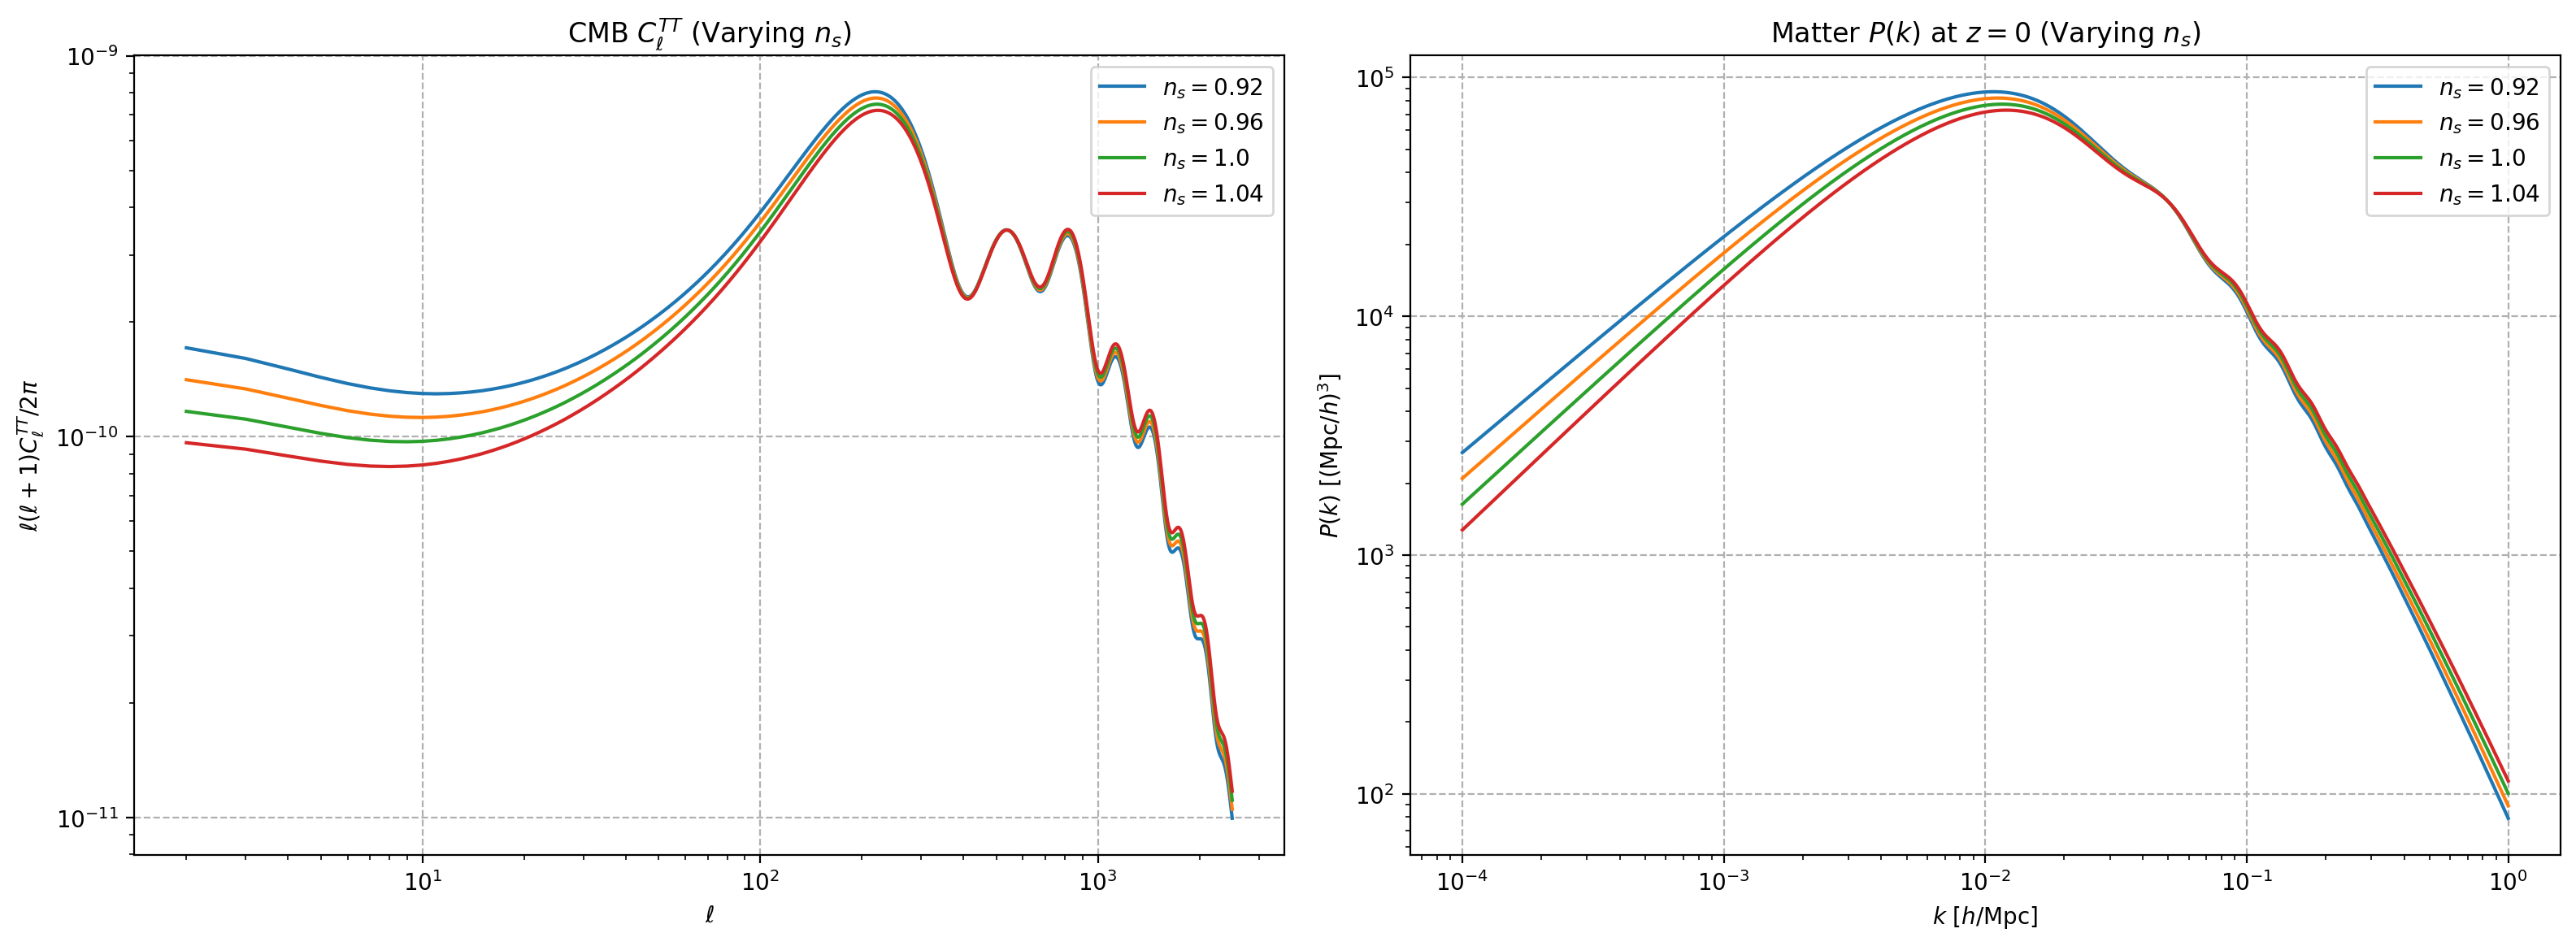

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for ns in ns_values:
    current_params = {}
    current_params['n_s'] = ns  # Update n_s

    cosmo_cpl = Class()
    cosmo_cpl.set({'Omega_Lambda':0.})
    cosmo_cpl.set({'omega_b':0.022383,'omega_cdm':0.12011,'h':0.6732,'ln_A_s_1e10':3.0448,'n_s':0.96605,'tau_reio':0.0543})
    cosmo_cpl.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
    cosmo_cpl.set(current_params)

    try:
        cosmo_cpl.compute()

        # ----- CMB Power Spectrum -----
        cls = cosmo_cpl.lensed_cl()
        ell = cls['ell'][2:]      # Skip ell=0,1
        cl_tt = cls['tt'][2:]
        ax1.loglog(ell, ell*(ell+1)*cl_tt/(2*np.pi),
                  label=f"$n_s={ns}$")

        # ----- Matter Power Spectrum -----
        k = np.logspace(-4, 0, 1000)  # k in h/Mpc
        pk = np.array([cosmo_cpl.pk(ki, 0.0) for ki in k])
        ax2.loglog(k, pk,
                  label=f"$n_s={ns}$")

    except Exception as e:
        print(f"Error for n_s={ns}: {e}")
    finally:
        cosmo_cpl.struct_cleanup()

# Plot formatting
ax1.set_title('CMB $C_\ell^{TT}$ (Varying $n_s$)')
ax1.set_xlabel('$\ell$')
ax1.set_ylabel('$\ell(\ell+1)C_\ell^{TT}/2\pi$')
ax1.legend()
ax1.grid(True, ls="--")

ax2.set_title('Matter $P(k)$ at $z=0$ (Varying $n_s$)')
ax2.set_xlabel('$k$ [$h$/Mpc]')
ax2.set_ylabel('$P(k)$ [$(\mathrm{Mpc}/h)^3$]')
ax2.legend()
ax2.grid(True, ls="--")

plt.tight_layout()
# plt.savefig('cmb_mpk_varying_ns.png', dpi=150)
plt.show()